# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [105]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import scipy.stats as sts
import matplotlib as mpl
import os
import datetime as dt

city_data_df= os.path.join("Resources/city_data.csv")
ride_data_df= os.path.join("Resources/ride_data.csv")


# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_df)
ride_data_df = pd.read_csv(ride_data_df)





In [106]:
city_data_df
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [107]:
ride_data_df


,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12


In [108]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

### Merge the DataFrames

In [109]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [110]:
pyber_data_df.dtypes


city             object
date             object
fare            float64
ride_id         float64
driver_count      int64
type             object
dtype: object

In [111]:
pd.value_counts(pyber_data_df["type"])

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [112]:
#check for empty spaces
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [113]:
#sum the null and show
pyber_data_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [114]:
#show the unique values in a specific key
pyber_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [115]:
#sum values in inside a key
sum(pyber_data_df["type"]=="Urban")

1625

In [116]:
#sum values in inside a key
sum(pyber_data_df["type"]=="Suburban")

625

In [117]:
#sum values in inside a key
sum(pyber_data_df["type"]=="Rural")

125

In [118]:
#create the DF for each type of city 
urban_df= pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_df = pyber_data_df[pyber_data_df["type"]== "Suburban"]
rural_df = pyber_data_df[pyber_data_df["type"]== "Rural"]

## Deliverable 1: Get a Summary DataFrame 

In [119]:
#  1. Get the total rides for each city type
total_ride_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_by_type 

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [120]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type 

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [121]:
#  3. Get the total amount of fares for each city type
total_amount_fares_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_amount_fares_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [122]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_amount_fares_type / total_ride_by_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [123]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_amount_fares_type / total_drivers_by_type 
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [124]:
#  6. Create a PyBer summary DataFrame.
pyber_summary_df = pd.DataFrame({"Avg fare per driver":avg_fare_per_driver, "Avg fare per ride":avg_fare_per_ride,
                                "total fares by city":total_amount_fares_type, "total drivers by type":total_drivers_by_type,"Total Rides":total_ride_by_type})
                                 

pyber_summary_df

,Avg fare per driver,Avg fare per ride,total fares by city,total drivers by type,Total Rides
type,,,,,
Rural,55.486282,34.623440,4327.93,78,125
Suburban,39.502714,30.970128,19356.33,490,625
Urban,16.571468,24.525772,39854.38,2405,1625


In [125]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Avg fare per driver,Avg fare per ride,total fares by city,total drivers by type,Total Rides
Rural,55.486282,34.623440,4327.93,78,125
Suburban,39.502714,30.970128,19356.33,490,625
Urban,16.571468,24.525772,39854.38,2405,1625


In [126]:
pyber_summary_df.dtypes

Avg fare per driver      float64
Avg fare per ride        float64
total fares by city      float64
total drivers by type      int64
Total Rides                int64
dtype: object

In [127]:
#  8. Format the columns.
pyber_summary_df["Avg fare per ride"] = pyber_summary_df["Avg fare per ride"].map("${:.2f}".format)
pyber_summary_df["Avg fare per driver"] = pyber_summary_df["Avg fare per driver"].map("${:.2f}".format)


In [128]:
pyber_summary_df

,Avg fare per driver,Avg fare per ride,total fares by city,total drivers by type,Total Rides
Rural,$55.49,$34.62,4327.93,78,125
Suburban,$39.50,$30.97,19356.33,490,625
Urban,$16.57,$24.53,39854.38,2405,1625


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [129]:
# 1. Read the merged DataFrame
pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'], format='%m/%d/%Y %H:%M')
pyber_data_df.dtypes

city                    object
date            datetime64[ns]
fare                   float64
ride_id                float64
driver_count             int64
type                    object
dtype: object

In [130]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:00,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:00,20.76,9.018730e+12,2,Rural
2372,North Jaime,2019-02-10 21:03:00,11.11,2.781340e+12,1,Rural
2373,West Heather,2019-05-07 19:22:00,44.94,4.256850e+12,4,Rural


In [131]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fare_by_date_and_type = pd.DataFrame(pyber_data_df.groupby(["type","date"]).sum()["fare"])
sum_fare_by_date_and_type


fare
type  date                      
Rural 2019-01-01 09:45:00  43.69
      2019-01-02 11:18:00  52.12
      2019-01-03 19:51:00  19.90
      2019-01-04 03:31:00  24.88
      2019-01-06 07:38:00  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:00  18.45
      2019-05-08 07:29:00  18.55
      2019-05-08 11:38:00  19.77
      2019-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [132]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_fare_by_date_and_type =sum_fare_by_date_and_type.reset_index()
sum_fare_by_date_and_type.head(10)

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
5,Rural,2019-01-08 06:19:00,19.39
6,Rural,2019-01-09 15:30:00,31.84
7,Rural,2019-01-11 04:39:00,16.42
8,Rural,2019-01-14 07:09:00,18.05
9,Rural,2019-01-14 15:58:00,54.10


In [133]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

sum_fare_by_date_and_type_pivot= sum_fare_by_date_and_type.pivot(index="date", columns="type", values= "fare")
sum_fare_by_date_and_type_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [134]:
#-- 5Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_Jan_April = sum_fare_by_date_and_type_pivot.loc['2019-01-01':'2019-04-28']
fares_Jan_April 

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [135]:
fares_Jan_April.dtypes

type
Rural       float64
Suburban    float64
Urban       float64
dtype: object

In [136]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fares_Jan_April.index = pd.to_datetime(fares_Jan_April.index)  


In [137]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_Jan_April.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [138]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_Jan_April_weekly = fares_Jan_April.resample("W").sum()
fares_Jan_April_weekly

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<Figure size 2000x500 with 0 Axes>

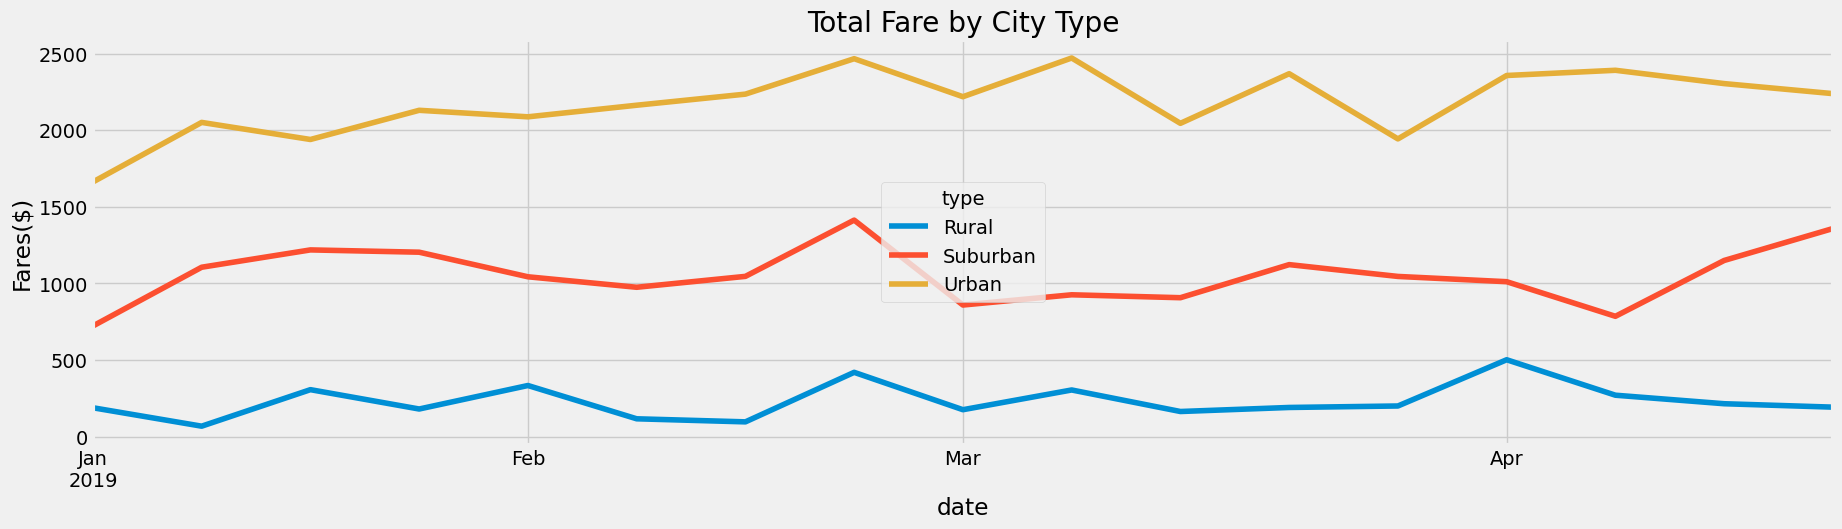

In [139]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.figure(figsize=(20,5))
style.use('fivethirtyeight')
ax = plt.axes(fares_Jan_April_weekly.plot(figsize=(20,5)))
ax.set_ylabel("Fares($)")
ax.set_title("Total Fare by City Type")

plt.savefig("analysis/Fig1.png")
